신경망 훈련

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 전처리
X_train_scaled = X_train / 255.0
X_test_scaled =X_test / 255.0

In [4]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Sequential

In [5]:
X_train_scaled.shape

(60000, 28, 28)

In [6]:
# 신경말 설계
# 첫번째 신경망 - 입력 데이터의 크기를 지정
# 나머지 신경망 - 출력 크기만 설정
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(100, activation='relu'),
    Dense(100, activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
Total params: 88600 (346.09 KB)
Trainable params: 88600 (346.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5551 - accuracy: 0.8075 - val_loss: 0.4168 - val_accuracy: 0.8517
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4009 - accuracy: 0.8577 - val_loss: 0.3713 - val_accuracy: 0.8715
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3605 - accuracy: 0.8703 - val_loss: 0.4023 - val_accuracy: 0.8606
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3378 - accuracy: 0.8784 - val_loss: 0.3796 - val_accuracy: 0.8709
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3228 - accuracy: 0.8842 - val_loss: 0.3926 - val_accuracy: 0.8627
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3095 - accuracy: 0.8889 - val_loss: 0.3483 - val_accuracy: 0.8780
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2995 - accuracy: 0.8945 - val_loss: 0.3711 - val_accuracy:

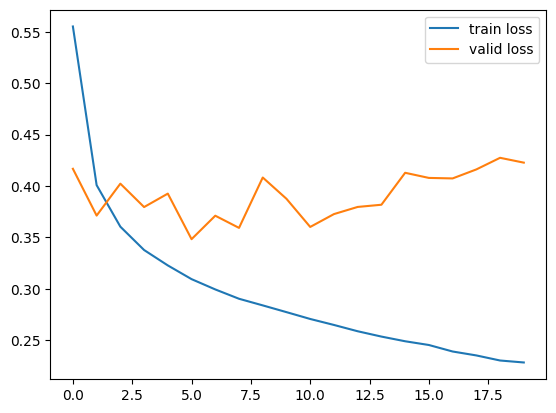

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='valid loss')
plt.legend()
plt.show()

# 3부터는 과적합 경향이 나타남

In [10]:
model = Sequential([
  Flatten(input_shape = (28,28)),
  Dense(100,activation='relu'),
  Dense(10,activation='softmax')
])

# 확실한 과적합 여부
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs = 20 )

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5344 - accuracy: 0.8149 - val_loss: 0.4700 - val_accuracy: 0.8336
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3994 - accuracy: 0.8575 - val_loss: 0.4009 - val_accuracy: 0.8597
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3581 - accuracy: 0.8692 - val_loss: 0.3905 - val_accuracy: 0.8584
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3328 - accuracy: 0.8780 - val_loss: 0.3725 - val_accuracy: 0.8683
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3139 - accuracy: 0.8845 - val_loss: 0.3669 - val_accuracy: 0.8730
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8897 - val_loss: 0.3353 - val_accuracy: 0.8838
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2819 - accuracy: 0.8955 - val_loss: 0.3346 - val_accuracy:

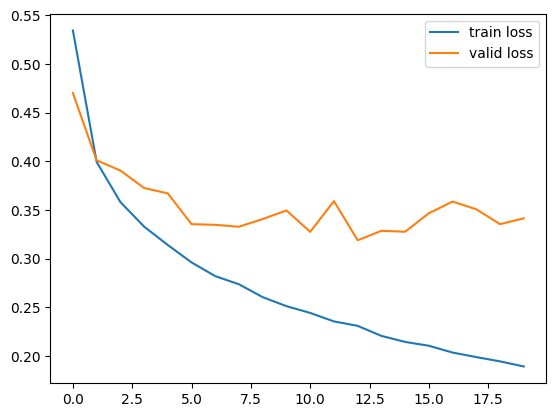

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='valid loss')
plt.legend()
plt.show()

# 3부터는 과적합 경향이 나타남

In [12]:
# 동일 모델 사용 다른 방법
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(100, activation='relu'),
    Dense(100, activation='softmax'),
])

인공신경망에서의 과적합여부는
   - fit : validation 까지 처리해서 시각화를 통해 파악

In [13]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax'),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
Total params: 88600 (346.09 KB)
Trainable params: 88600 (346.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7468 - accuracy: 0.7503 - val_loss: 0.4590 - val_accuracy: 0.8336
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5067 - accuracy: 0.8198 - val_loss: 0.4029 - val_accuracy: 0.8537
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4683 - accuracy: 0.8317 - val_loss: 0.3909 - val_accuracy: 0.8545
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4461 - accuracy: 0.8394 - val_loss: 0.3987 - val_accuracy: 0.8512
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4324 - accuracy: 0.8422 - val_loss: 0.3630 - val_accuracy: 0.8678
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4197 - accuracy: 0.8463 - val_loss: 0.3572 - val_accuracy: 0.8707
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4112 - accuracy: 0.8506 - val_loss: 0.3628 - val_accuracy:

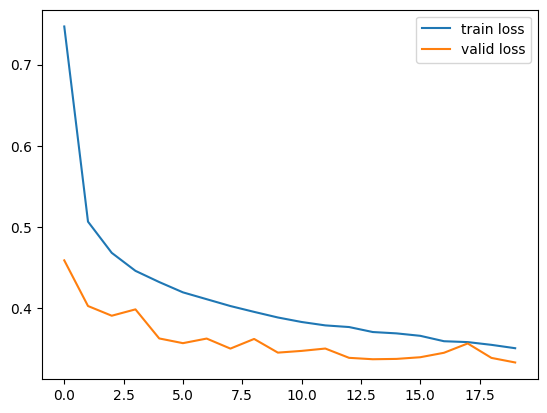

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs = 20 )

plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'], label = 'valid loss')
plt.legend()
plt.show()

In [15]:
# 모델 저장 - 가중치 저장
model.save_weights("model_weight.keras")

In [16]:
# 모델의 구조까지 포함해서 저장
model.save("model_whole.keras")

In [17]:
# 모델전체구조 복원
whole_model = keras.models.load_model("model_whole.keras")

In [18]:
# 모델 가중치 복원
weight_model = Sequential([
  Flatten(input_shape = (28,28)),
  Dense(100,activation='relu'),
  Dropout(0.5),
  Dense(10,activation='softmax')
])
weight_model.load_weights("model_weight.keras")

ValueError: Cannot assign value to variable ' dense_9/kernel:0': Shape mismatch.The variable shape (100, 10), and the assigned value shape (100, 100) are incompatible.

In [19]:
whole_model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8737


[0.36539188027381897, 0.8737000226974487]

In [20]:
weight_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
weight_model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.5597 - accuracy: 0.1145


[3.5597269535064697, 0.1145000010728836]

콜벡
- 사용자 함수를 정의, 제공(특정이벤트에)하면 운영체제가 특정 이벤트에 발생하면 호출하는 함수
- keyup, mouseClick,buttonClick....
- 인공지능
  - 학습완료시
  - 매학습마다 성능 평가를 해해서 이전 상황과 변동이 없을때

In [21]:
# 모델설계 drop out
new_model = Sequential([
    Flatten(input_shape = (28,28)),   # 2차원을 1차원으로
    Dense(100, activation='relu'),    # 신경망- 입력층
    Dropout(0.5),                     # 드랍아웃 0.5는 50퍼의 뉴런의 가중치를 0 -> 학습하지 않는다,
    Dense(100, activation='softmax')  # 출력층
])

In [22]:
# 모댈 컴파일
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [23]:
# 저장 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras',save_best_only=True)
hist = new_model.fit(X_train_scaled,y_train,validation_split=0.2,callbacks=[checkpoint_cb],epochs=20)
# 콜백으로 모델을 수행 후 최상의 모델을 가져다가 사용

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7442 - accuracy: 0.7496 - val_loss: 0.4547 - val_accuracy: 0.8346
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5070 - accuracy: 0.8182 - val_loss: 0.4139 - val_accuracy: 0.8493
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4662 - accuracy: 0.8337 - val_loss: 0.3884 - val_accuracy: 0.8551
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4483 - accuracy: 0.8366 - val_loss: 0.3681 - val_accuracy: 0.8648
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4330 - accuracy: 0.8424 - val_loss: 0.3748 - val_accuracy: 0.8630
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4190 - accuracy: 0.8493 - val_loss: 0.3553 - val_accuracy: 0.8717
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4088 - accuracy: 0.8502 - val_loss: 0.3600 - val_accuracy:

In [24]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

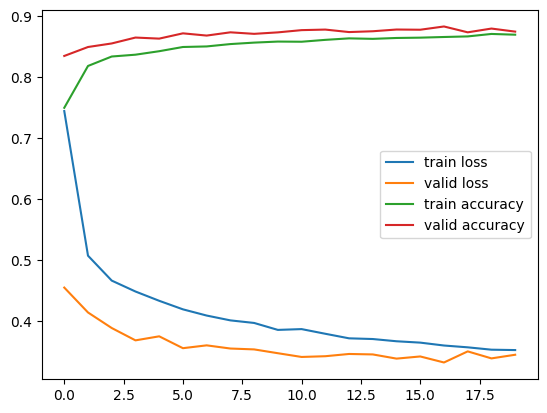

In [25]:
# 평가데이터를 한개의 화면에 시각화
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label = 'valid loss')
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'valid accuracy')
plt.legend()
plt.show()

In [26]:
best_model = keras.models.load_model('best_model.keras')
best_model.evaluate(X_train_scaled, y_train), best_model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3624 - accuracy: 0.8719


([0.2799474000930786, 0.8962500095367432],
 [0.36239373683929443, 0.8719000220298767])

In [27]:
new_model.evaluate(X_train_scaled, y_train), new_model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3772 - accuracy: 0.8690


([0.2865467965602875, 0.8895999789237976],
 [0.3772485554218292, 0.8690000176429749])

In [28]:
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [29]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

X_train_scaled = X_train / 255.0;   X_test_scaled = X_test / 255.0

ealy_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

# 모델생성
model = Sequential([
  Flatten(input_shape = (28,28)),  # 2차원을 1차원
  Dense(100,activation='relu'),    # 신경망 - 입력층
  Dropout(0.5),                    # 드랍아웃 0.5는 50%의 뉴런의 가중치를 0--> 학습하지 않는다
  Dense(10,activation='softmax')   # 출력층
])
# 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics='acc')
# 학습 - callback = checkpoint, earlystopping  epochs=100
hist = model.fit(X_train_scaled,y_train,validation_split=0.2,callbacks=[checkpoint_cb,ealy_stopping],epochs=200)

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6665 - acc: 0.7687 - val_loss: 0.4645 - val_acc: 0.8262
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5006 - acc: 0.8221 - val_loss: 0.4054 - val_acc: 0.8512
Epoch 3/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4672 - acc: 0.8313 - val_loss: 0.3899 - val_acc: 0.8597
Epoch 4/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4411 - acc: 0.8402 - val_loss: 0.3680 - val_acc: 0.8662
Epoch 5/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4305 - acc: 0.8438 - val_loss: 0.3674 - val_acc: 0.8660
Epoch 6/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4143 - acc: 0.8492 - val_loss: 0.3605 - val_acc: 0.8668
Epoch 7/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4073 - acc: 0.8497 - val_loss: 0.3590 - val_acc: 0.8688
Epoch 8/200
1500/1500 [==============================] 

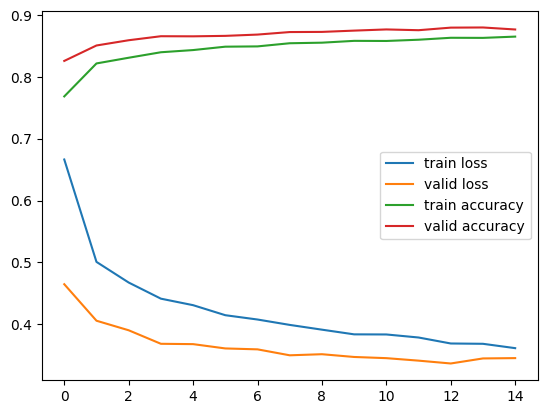

In [32]:
# 평가데이터를 한개의 화면에 시각화
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label = 'valid loss')
plt.plot(hist.history['acc'], label = 'train accuracy')
plt.plot(hist.history['val_acc'], label = 'valid accuracy')
plt.legend()
plt.show()